In [6]:
#  covolution neural networks

In [17]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from cnn_utils import *
from keras.preprocessing import image
from matplotlib.pyplot import imshow
from keras.models import Model
%matplotlib inline
np.random.seed(1)

In [3]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

In [4]:
# VSISUALIZES IMAGES 

y = 0


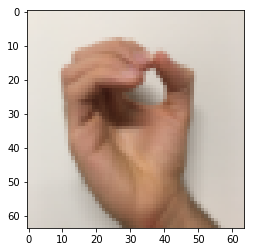

In [55]:
index = 1
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

In [6]:
X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


In [7]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
classifier = Sequential()
classifier.add(Conv2D(32, (3, 3), input_shape = (64,64, 3), activation = 'relu',strides=1, padding='same'))
classifier.add(MaxPooling2D(pool_size = (8, 8)))
classifier.add(Conv2D(32, (3, 3), activation = 'relu',padding='same'))
classifier.add(MaxPooling2D(pool_size = (4, 4)))
classifier.add(Flatten())
classifier.add(Dense(units = 6, activation = 'softmax'))
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [19]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 32)          9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 774       
Total params: 10,918
Trainable params: 10,918
Non-trainable params: 0
_________________________________________________________________


In [9]:
classifier.fit(X_train, Y_train, batch_size=64,epochs=100,verbose=1,validation_data=(X_test, Y_test))

Train on 1080 samples, validate on 120 samples
Epoch 1/100
1080/1080 [==============================] - 5s 5ms/step - loss: 1.8011 - acc: 0.1972 - val_loss: 1.7834 - val_acc: 0.2583
Epoch 2/100
1080/1080 [==============================] - 4s 4ms/step - loss: 1.7812 - acc: 0.2463 - val_loss: 1.7700 - val_acc: 0.2750
Epoch 3/100
1080/1080 [==============================] - 4s 4ms/step - loss: 1.7672 - acc: 0.2556 - val_loss: 1.7532 - val_acc: 0.4333
Epoch 4/100
1080/1080 [==============================] - 4s 4ms/step - loss: 1.7481 - acc: 0.3704 - val_loss: 1.7305 - val_acc: 0.4833
Epoch 5/100
1080/1080 [==============================] - 4s 4ms/step - loss: 1.7208 - acc: 0.4148 - val_loss: 1.6970 - val_acc: 0.5167
Epoch 6/100
1080/1080 [==============================] - 4s 4ms/step - loss: 1.6852 - acc: 0.4287 - val_loss: 1.6488 - val_acc: 0.4917
Epoch 7/100
1080/1080 [==============================] - 4s 4ms/step - loss: 1.6193 - acc: 0.4630 - val_loss: 1.5817 - val_acc: 0.5167
Epoch 8/

Epoch 61/100
1080/1080 [==============================] - 4s 4ms/step - loss: 0.1609 - acc: 0.9750 - val_loss: 0.3222 - val_acc: 0.8667
Epoch 62/100
1080/1080 [==============================] - 4s 4ms/step - loss: 0.1691 - acc: 0.9611 - val_loss: 0.3127 - val_acc: 0.8833
Epoch 63/100
1080/1080 [==============================] - 4s 4ms/step - loss: 0.1524 - acc: 0.9778 - val_loss: 0.3177 - val_acc: 0.8917
Epoch 64/100
1080/1080 [==============================] - 4s 4ms/step - loss: 0.1452 - acc: 0.9778 - val_loss: 0.3097 - val_acc: 0.8833
Epoch 65/100
1080/1080 [==============================] - 4s 4ms/step - loss: 0.1395 - acc: 0.9778 - val_loss: 0.2902 - val_acc: 0.8917
Epoch 66/100
1080/1080 [==============================] - 4s 4ms/step - loss: 0.1410 - acc: 0.9769 - val_loss: 0.2600 - val_acc: 0.8917
Epoch 67/100
1080/1080 [==============================] - 4s 4ms/step - loss: 0.1400 - acc: 0.9741 - val_loss: 0.2693 - val_acc: 0.9000
Epoch 68/100
1080/1080 [========================

# DEFINE HARD MAX AND CLASSIFY FUNCTIONS

In [10]:
def hardmax(arrayput):
    max= 0
    maxindices =0
    for i in range(len(arrayput)):
        if arrayput[i]>max:
            max=arrayput[i]
            maxindices=i
    for i in range(len(arrayput)):
        if i==maxindices:
            arrayput[i]=1
        else:
            arrayput[i]=0
    return arrayput
def classify(arrayput):
    if arrayput[0]==1:
        return "zero"
    if arrayput[1]==1:
        return "one"
    if arrayput[2]==1:
        return "two"
    if arrayput[3]==1:
        return "three"
    if arrayput[4]==1:
        return "four"
    if arrayput[5]==1:
        return "five"

# VISUALIZATION ON TEST SETS

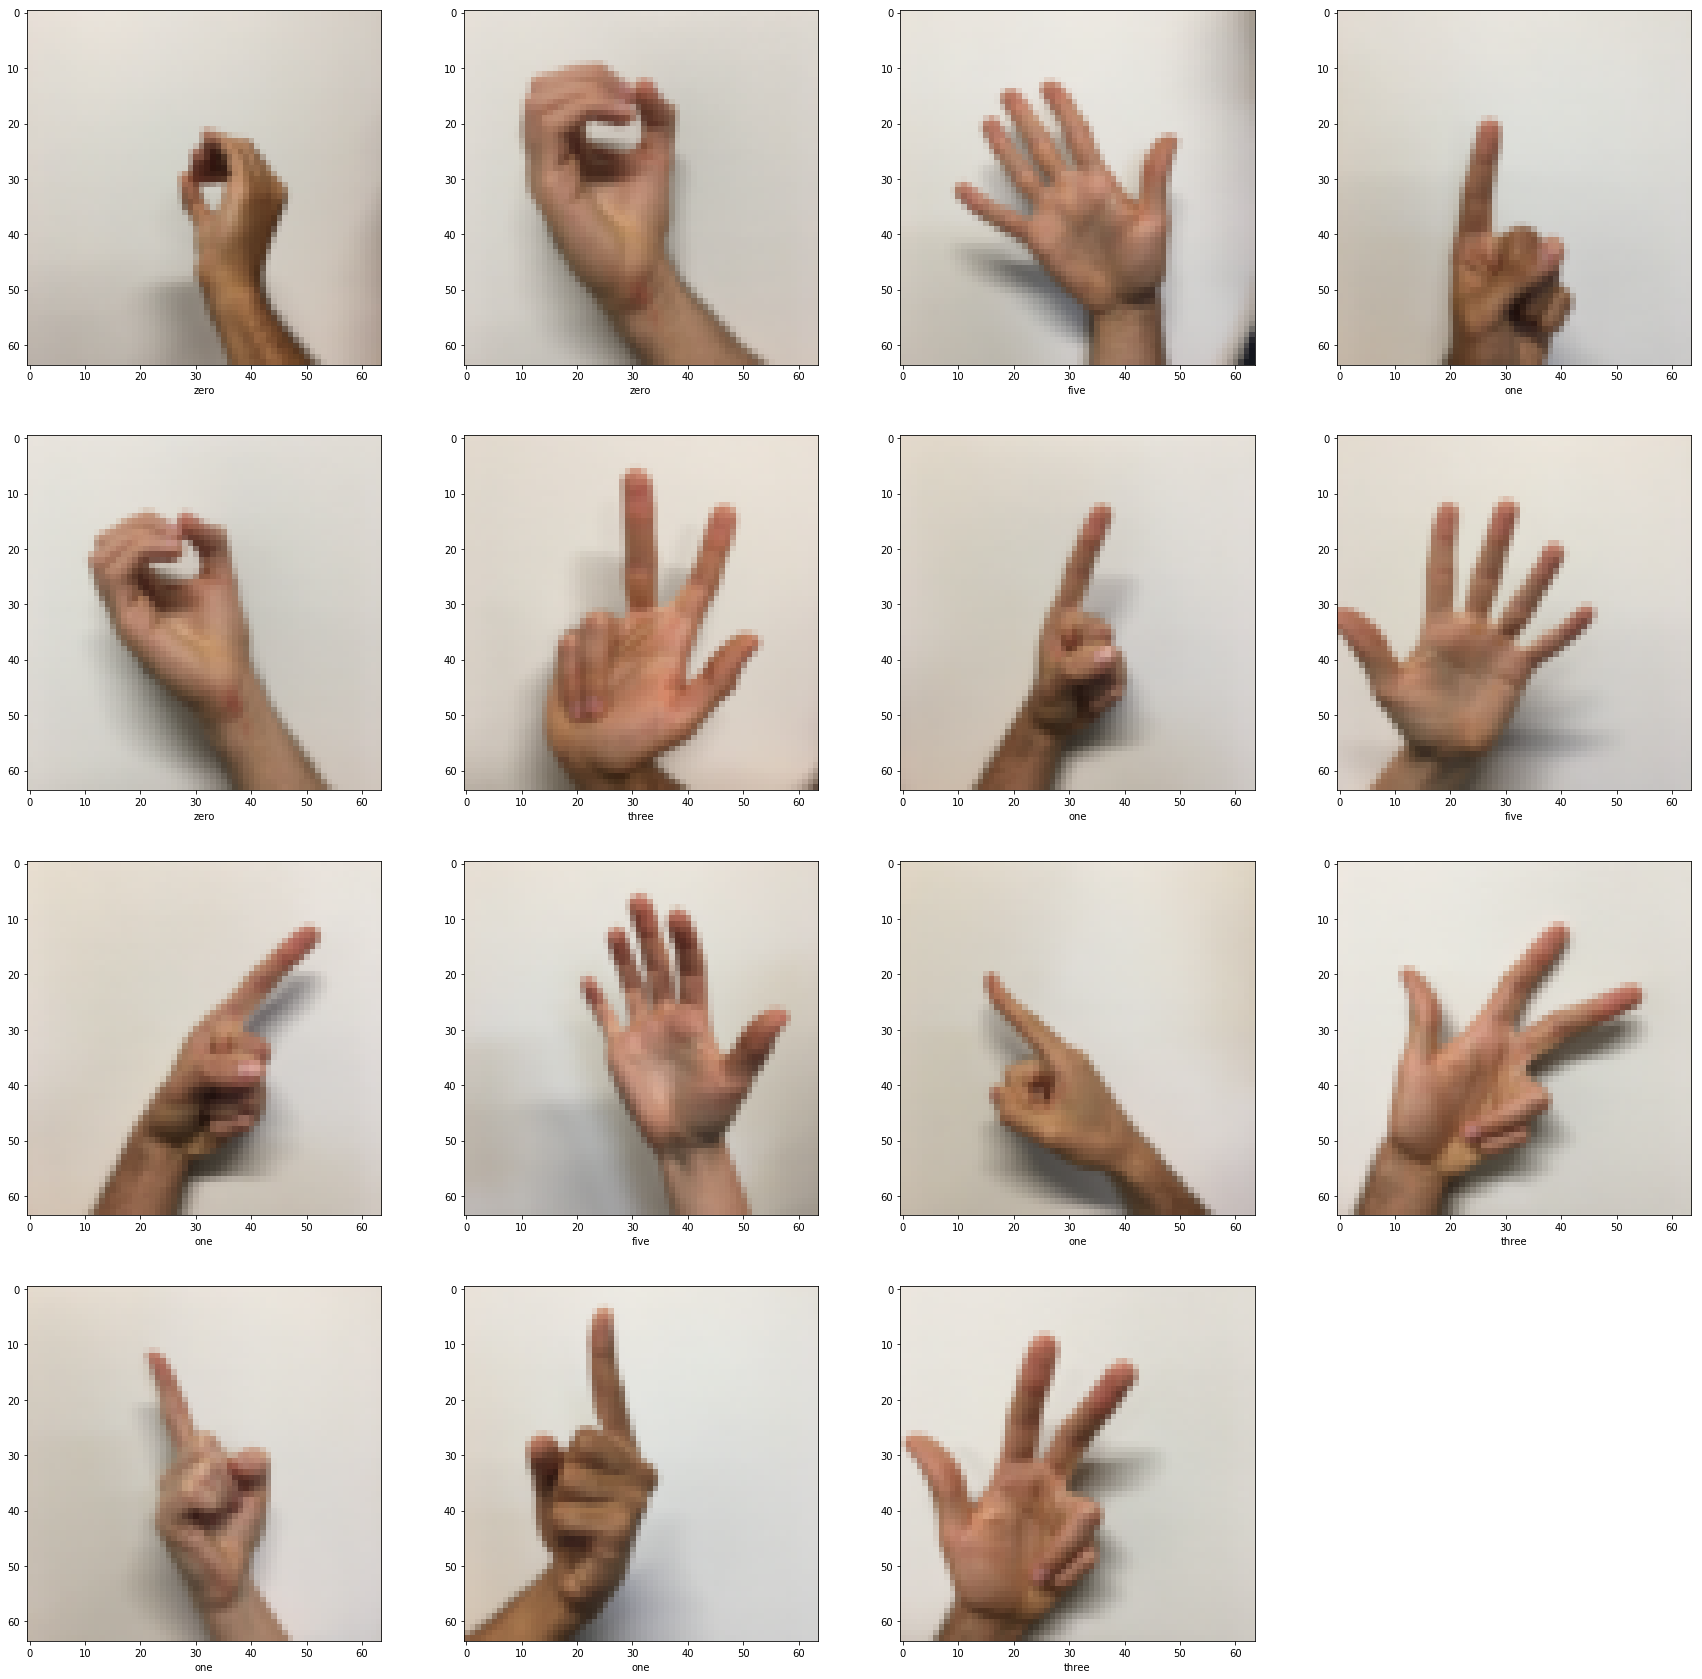

In [14]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(30,30))
columns = 4
rows = 4
for i in range(1, columns*rows):
    img =X_test[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    plt.xlabel(classify(hardmax(classifier.predict(X_test)[i])))
plt.show()

# VISUALIZATION INTERMEDIATE LAYERS

(1, 64, 64, 32)


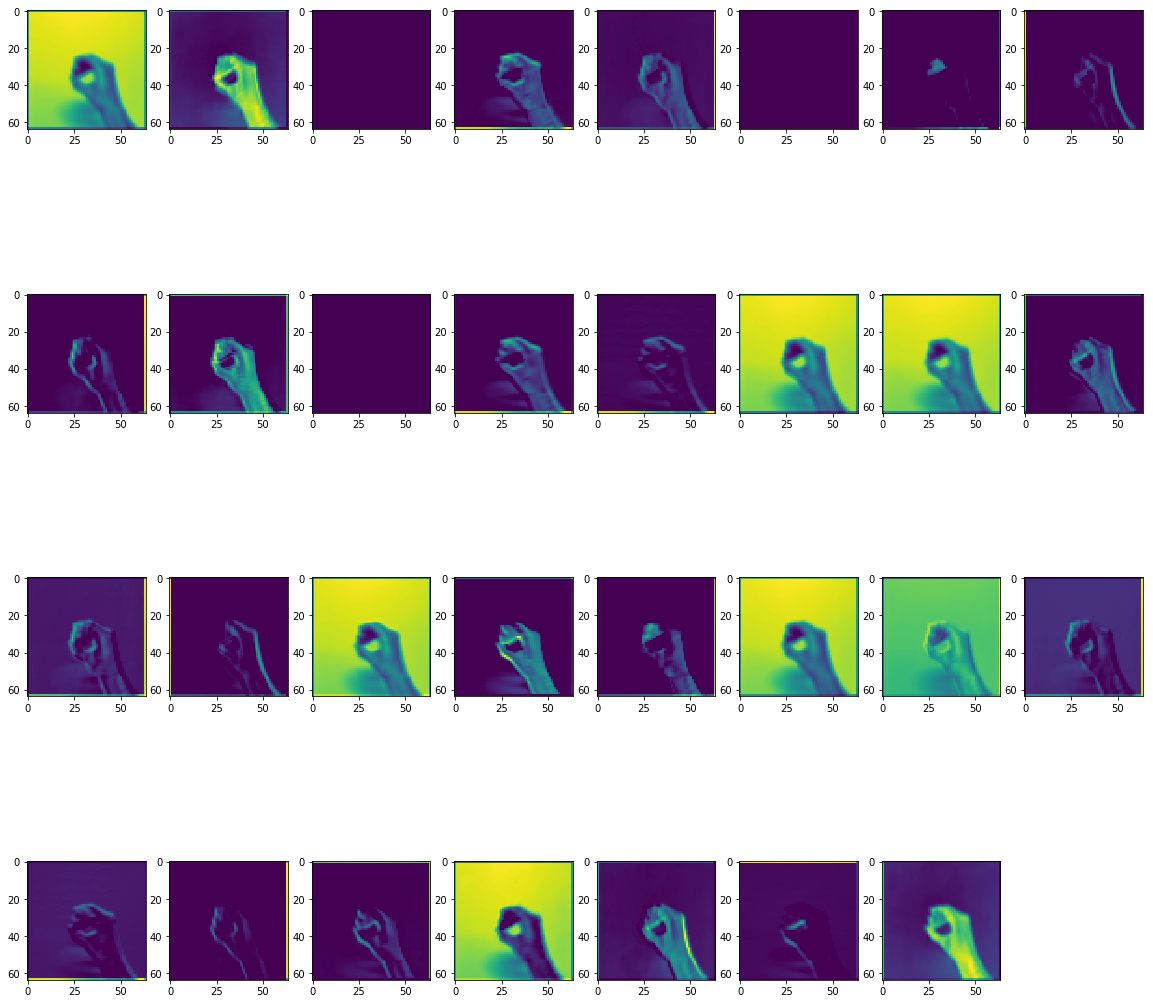

In [26]:
layer_name = 'conv2d_1'
intermediate_layer_model = Model(inputs=classifier.input,
                                 outputs=classifier.get_layer(layer_name).output)
x = np.expand_dims(X_test[0], axis=0)
intermediate_output = intermediate_layer_model.predict(x)
print(intermediate_output.shape)
import numpy as np
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(20, 20))
columns = 8
rows = 4
for i in range(1, columns*rows):
    img = intermediate_output[0,:,:,i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

(1, 8, 8, 32)


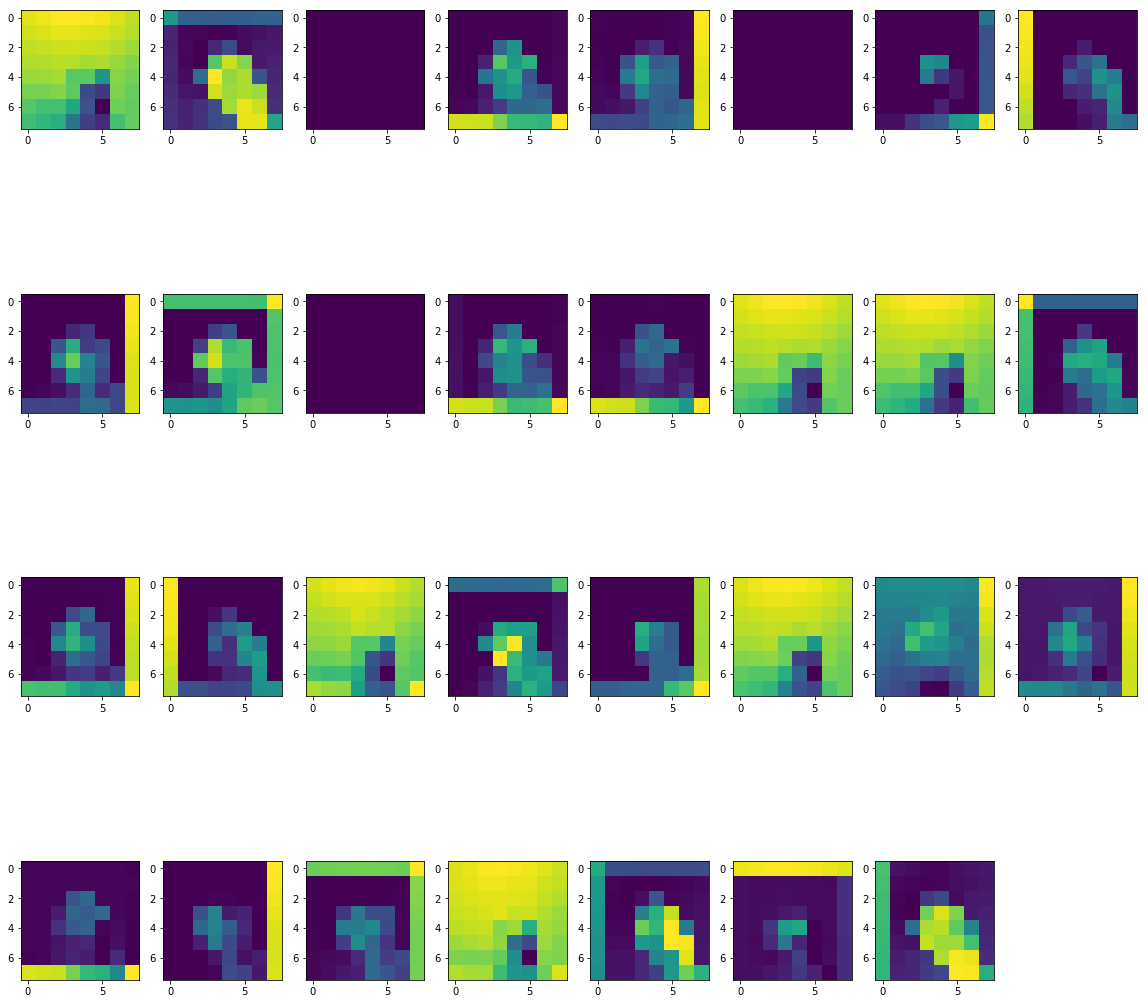

In [27]:
layer_name = 'max_pooling2d_1'
intermediate_layer_model = Model(inputs=classifier.input,
                                 outputs=classifier.get_layer(layer_name).output)
x = np.expand_dims(X_test[0], axis=0)
intermediate_output = intermediate_layer_model.predict(x)
print(intermediate_output.shape)
import numpy as np
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(20, 20))
columns = 8
rows = 4
for i in range(1, columns*rows):
    img = intermediate_output[0,:,:,i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

(1, 8, 8, 32)


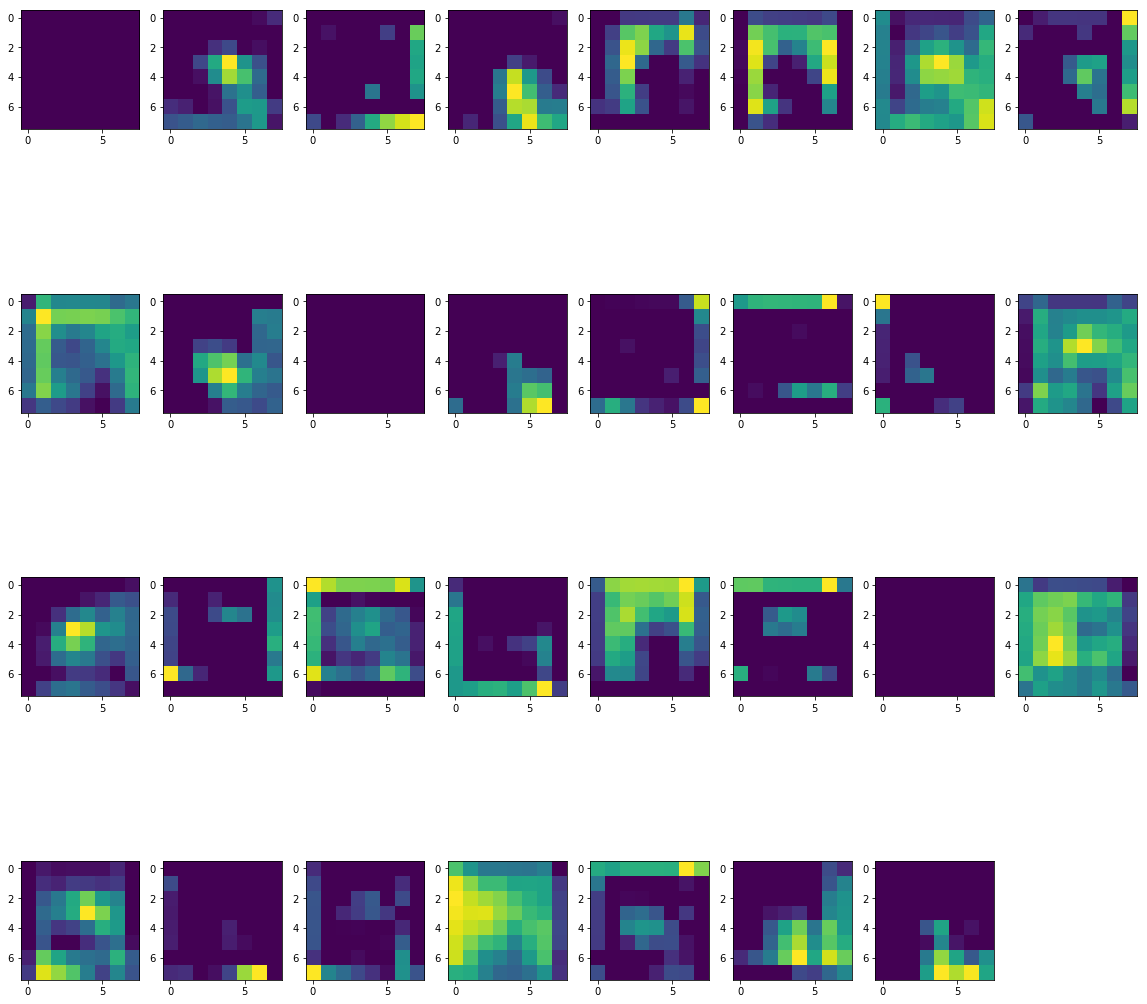

In [28]:
layer_name = 'conv2d_2'
intermediate_layer_model = Model(inputs=classifier.input,
                                 outputs=classifier.get_layer(layer_name).output)
x = np.expand_dims(X_test[0], axis=0)
intermediate_output = intermediate_layer_model.predict(x)
print(intermediate_output.shape)
import numpy as np
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(20, 20))
columns = 8
rows = 4
for i in range(1, columns*rows):
    img = intermediate_output[0,:,:,i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

(1, 2, 2, 32)


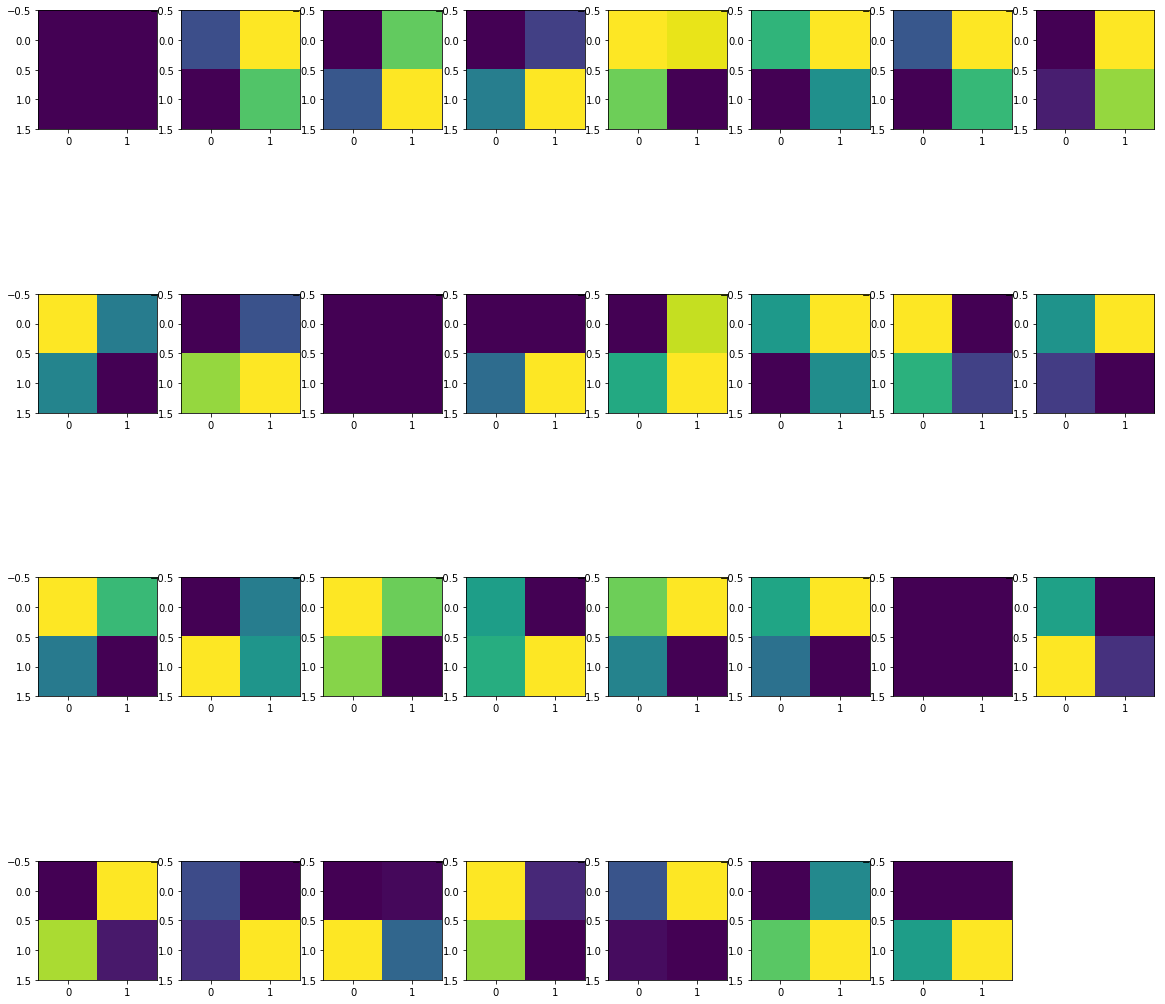

In [29]:
layer_name = 'max_pooling2d_2'
intermediate_layer_model = Model(inputs=classifier.input,
                                 outputs=classifier.get_layer(layer_name).output)
x = np.expand_dims(X_test[0], axis=0)
intermediate_output = intermediate_layer_model.predict(x)
print(intermediate_output.shape)
import numpy as np
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(20, 20))
columns = 8
rows = 4
for i in range(1, columns*rows):
    img = intermediate_output[0,:,:,i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()